<h1 style="text-align:center;">Лабораторная работа №1</h1>

<h2 style="text-align:center;">Решение задачи экстраполяции различными методами</h2>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>


Цель: решить выбранную задачу перечисленными методами: 
1. Классическая полиномиальная интерполяция по Ньютону
2. Сплайн-интерполяция
3. Метод наименьших квадратов

В чем суть?

**Аппроксимация** — научный метод, состоящий в замене одних объектов другими, в каком-то смысле близкими к исходным, но более простыми.Простыми словами, аппроксимировать — это заменить одни результаты другими, близкими к исходным, но упрощёнными. 

**Интерполяция** - нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом.


**Экстраполяция** - особый тип аппроксимации, при котором функция аппроксимируется вне заданного интервала, а не между заданными значениями. Иными словами, экстраполяция — приближённое определение значений функции $f(x)$ в точках $x$,
 лежащих вне отрезка $[x_{0},x_{n}]$, по её значениям в точках $x_{0}<x_{1}<...<x_{n}$.


<img src="image.png" alt="drawing" width="650"/>


Итак, с помощью аппроксимации мы находим функцию приближенным методом. 

С помощью интерполяции или экстраполяции находим значение нужных точек внутри таблицы или за её пределами.

<img src="task_lab_4.png" alt="drawing" width="650"/>

In [169]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [170]:
#запишем данные о населении России (РСФСР) за последние 100 лет в массивы
#данные взяты с https://ru.wikipedia.org/wiki/Население_России

x = [1926,      1937,      1946,     1956,      1966,      1976,      1986,      1996,      2006]      #годы
y = [100891244, 104932000, 97547000, 112266000, 127189098, 134549101, 143527861, 148291638, 142753551] #население

#Данные для экстраполяции
x_true = [2016]
y_true = [146544710]


**1) Классическая полиномиальная интерполяция по Ньютону.**

<img src="sep_diff_.png" alt="drawing" width="580"/>
<img src="sep_diff.png" alt="drawing" width="650"/>

Сначала посчитаем разделенные разности для данных и используем эту функцию в основной.

In [171]:
# функция вычисляет разделенные разности
def sep_diff(x, y):
    n = len(x) #количество данных
    dif = np.zeros([n, n])
    
    for i in range(n):
        dif[i, 0] = y[i]  # Первая колонка - значения y
    
    for j in range(1, n): #столбцы все кроме 0го
        for i in range(n - j): # строки - от 0 по n-j-1
            dif[i][j] = (dif[i + 1][j - 1] - dif[i][j - 1]) / (x[i + j] - x[i])
    
    return dif[0, :]  # Возвращаем первую строку (коэффициенты)


In [172]:
# Функция для вычисления значения интерполяционного многочлена
def newton(x, coef, x_val):
    #x_val - точка для расчета интерполяционного многочлена
    n = len(coef)
    result = coef[0]
    product = 1
    
    for i in range(1, n):
        product *= (x_val - x[i - 1])
        result += coef[i] * product
    
    return result

In [173]:
# Вычисление коэффициентов
coeffs = sep_diff(x, y)
print(coeffs)


[ 1.00891244e+08  3.67341455e+05 -5.93948505e+04  6.00168020e+03
 -2.53175682e+02  6.51521360e+00 -1.09254913e-01  9.25520890e-04
  8.24388451e-06]


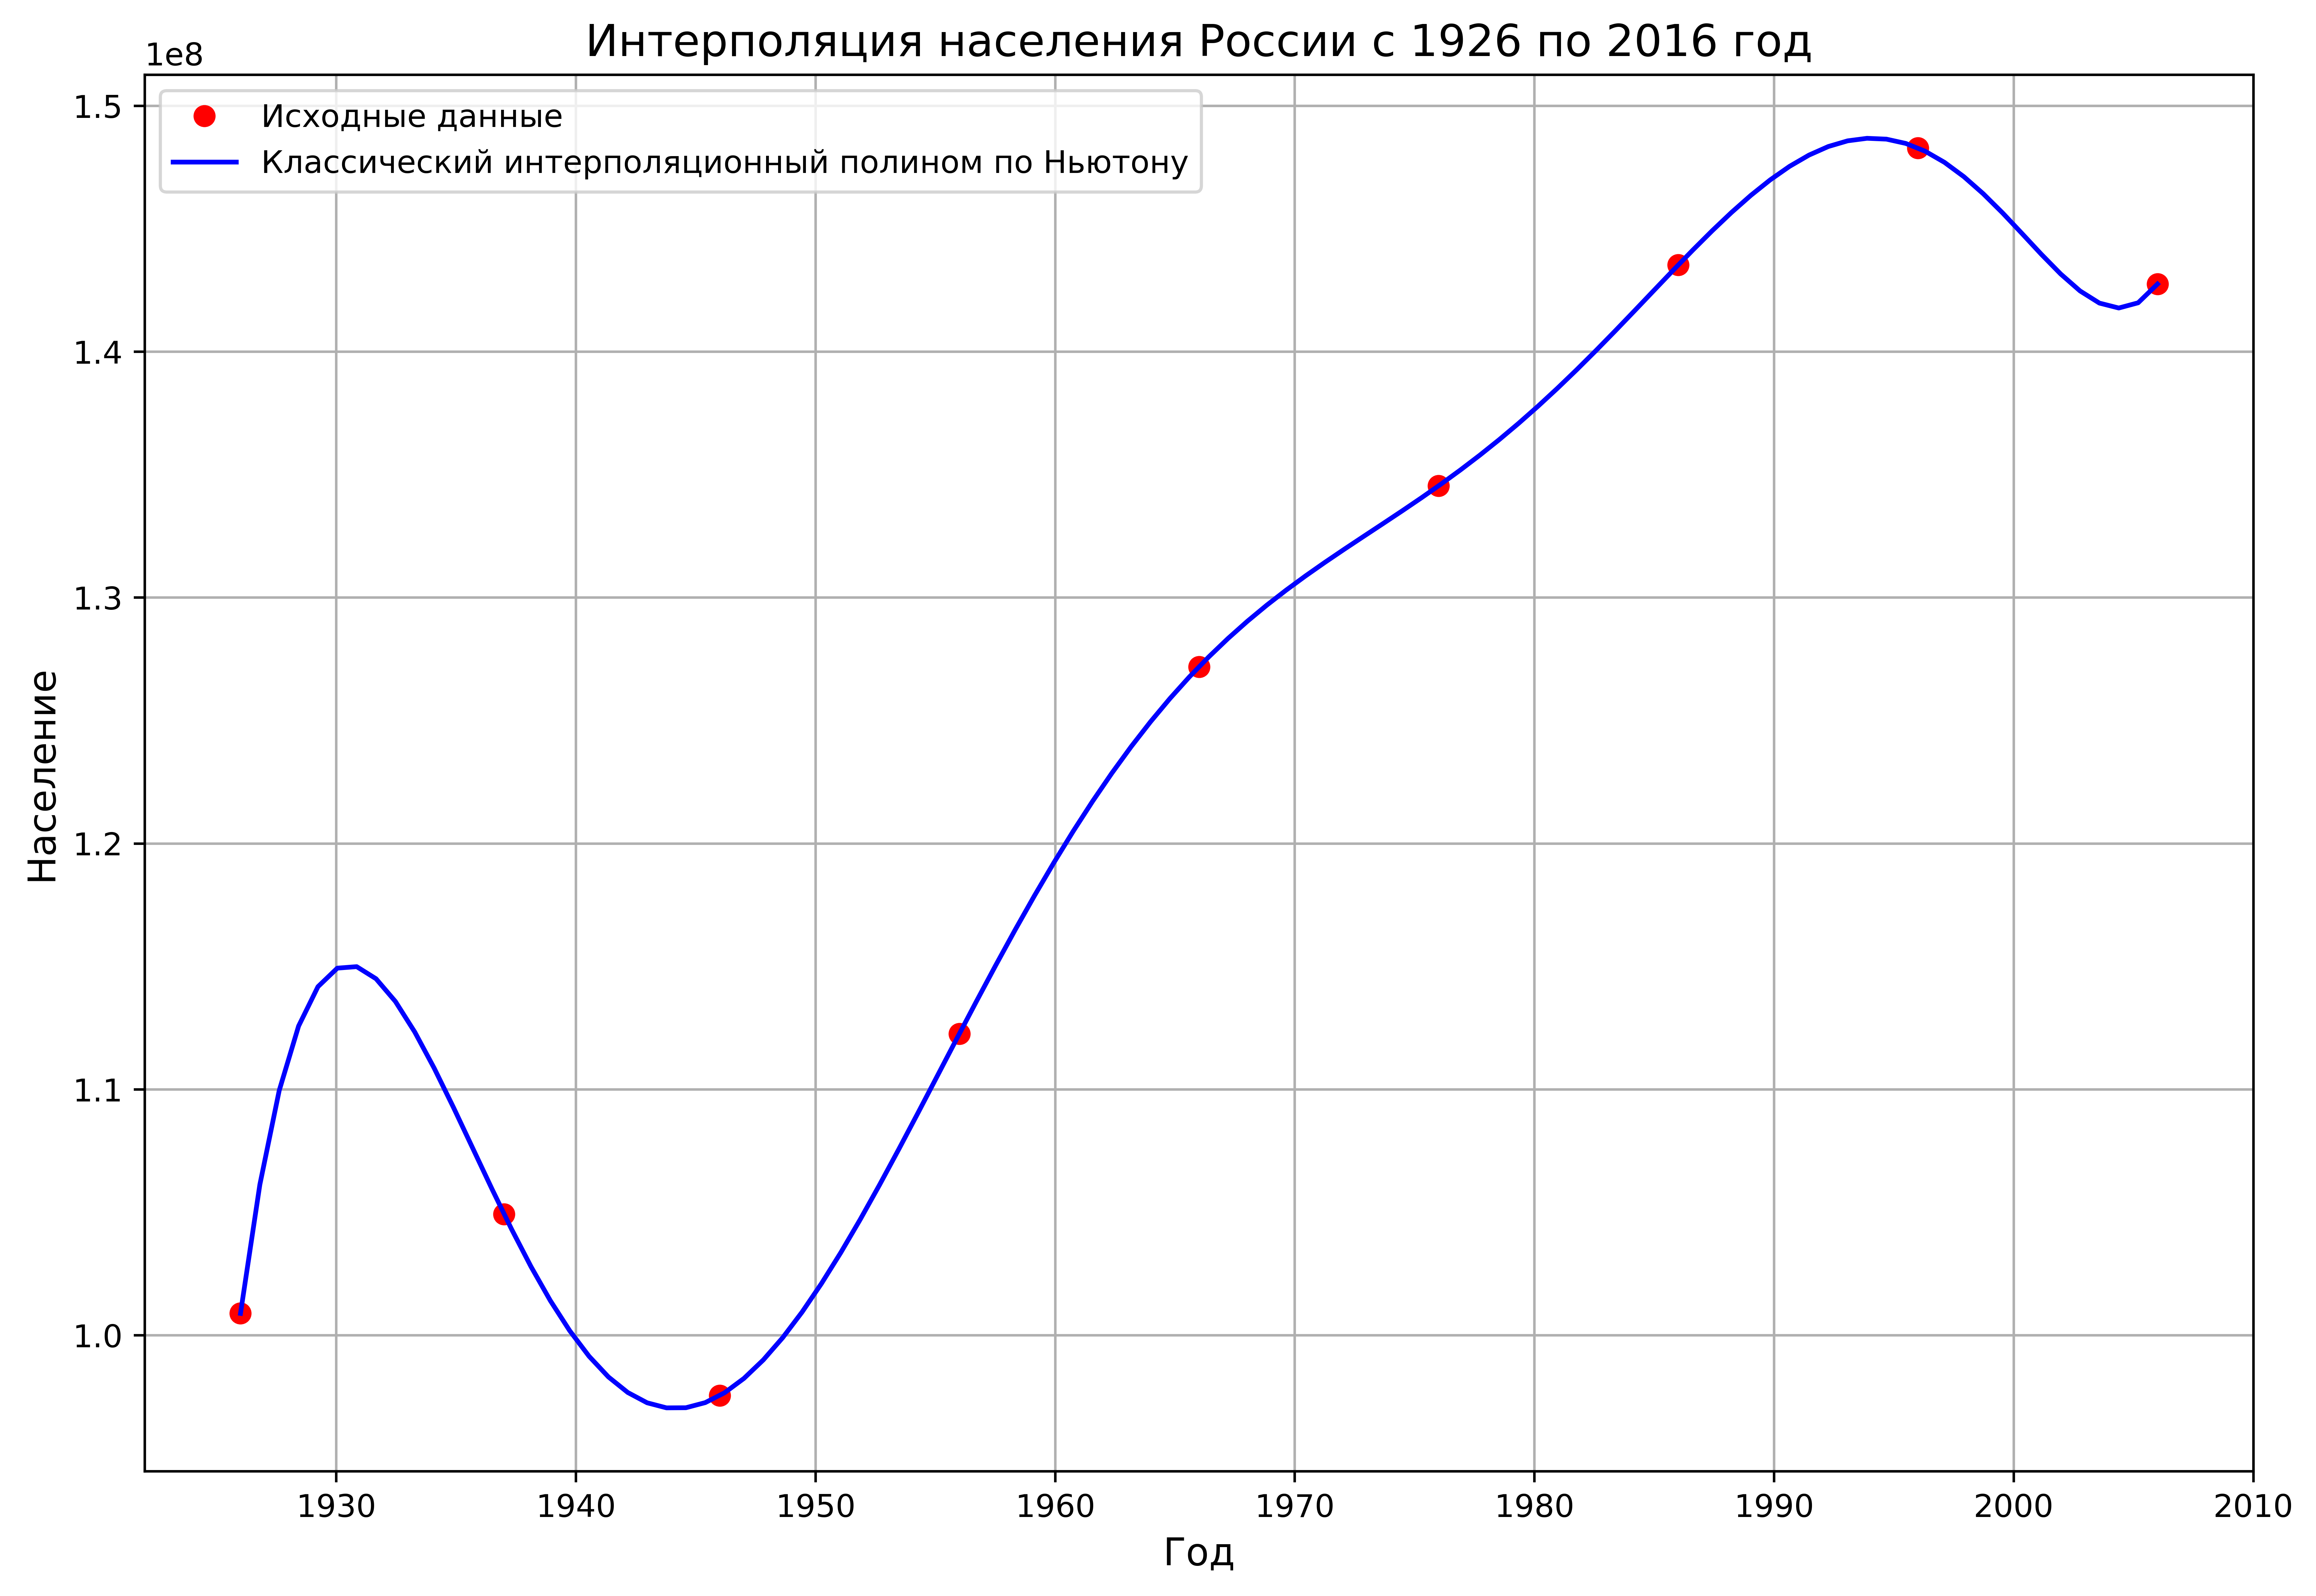

Оценка населения в 2016 году: 294772563


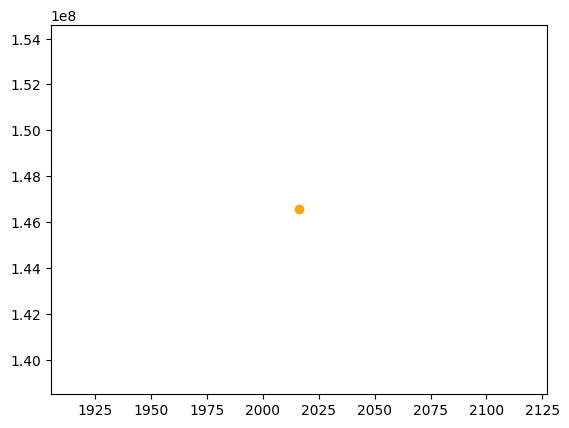

In [178]:
# Создание плотных точек для построения графика
x_dense = np.linspace(min(x), max(x), 100) # чем больше здесь точек, тем более гладкая прямая
y_dense = [newton(x, coeffs, xi) for xi in x_dense]

# Построение графика
plt.figure(figsize=(12, 8), dpi=700)

#исходные данные - заданные для интерполяции точки
plt.plot(x, y, 'o', label='Исходные данные', color='red')

#производим интерполяцию по выбранным точкам
plt.plot(x_dense, y_dense, label='Классический интерполяционный полином по Ньютону', color='blue')


plt.title('Интерполяция населения России с 1926 по 2016 год', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Население', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

# Годы для экстраполяции
year_to_extrapolate = 2016
extrapolate = newton(x, coeffs, year_to_extrapolate)

print(f"Оценка населения в {year_to_extrapolate} году: {extrapolate:.0f}")


# проводим экстраполяцию для точки 2010
extrapolated_years = [2010]
extrapolated_populations = extrapolate
#plt.plot(extrapolated_years, extrapolated_populations, 'x', label='Экстраполяция аналогичным полиномом', color='green')
#реальные данные - для проверки экстраполяции
plt.plot(x_true, y_true, 'o', label='Реальные данные', color='orange')

Оценка населения в 2010 году: 160957606


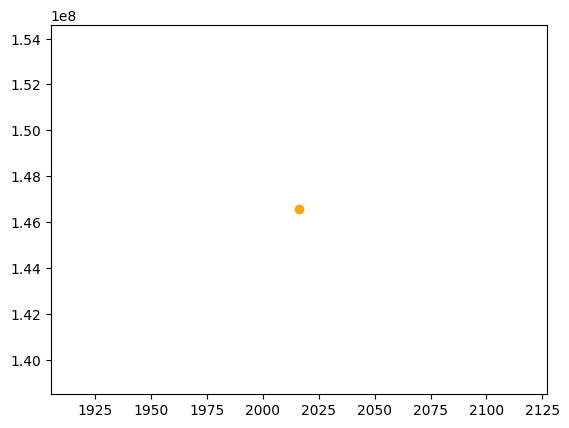

In [ ]:
# Вычисление экстраполированных значений


Как можем видеть, этот метод для экстраполяции не подходит!
TODO выяснить причину